In [2]:
import numpy as np
import matplotlib.pyplot as plt

from multi_cauchy import (
    MvsHFile,
    MvsHMeasurement,
    cauchy_cdf,
    multi_cauchy_cdf,
    fit_multi_cauchy_cdf,
    CauchyParams,
    cauchy_pdf,
    multi_cauchy_pdf,
    fit_multi_cauchy_pdf,
    quick_find_peaks,
    plot_cdf_fit,
    plot_pdf_fit,
    fit_multi_cauchy_cdf_and_pdf,
)

In [3]:
file1 = MvsHFile(r"C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\tests\sample_files\201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH.dat") # 1
file2 = MvsHFile(r"C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\tests\sample_files\200710 - [Er(TiPS2COT)I(THF)]2 - 2 - 1 - MvsH - VSM.dat") # 2
file3 = MvsHFile(r"C:\Users\pcb74\Documents\lab\Python\multi_cauchy\multi_cauchy\tests\sample_files\201201 - [Er_TIPS2COT_I]3 - 2 - 1 - MvsH.dat") # 3

In [4]:
file3.temperatures

[2.0]

In [5]:
meas = MvsHMeasurement(file3, 0)

In [6]:
meas_h = meas.forward['field']
meas_m = meas.forward['moment']/meas.forward['moment'].max()
meas_dmdh = np.gradient(meas_m, meas_h)

[-1492.04553222656, 1252.74133300781, 5864.71142578125]

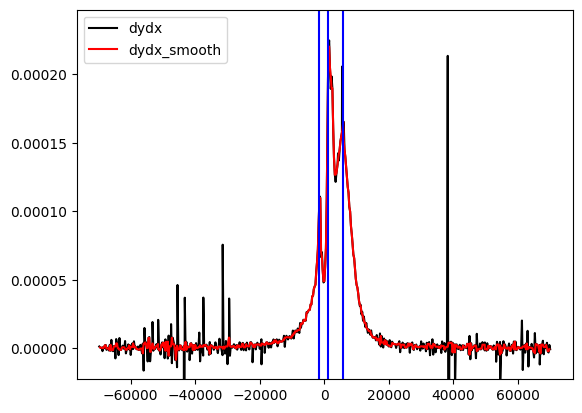

In [18]:
peaks, fig, ax = quick_find_peaks(meas_h, meas_m)
peaks

In [19]:
temp_peaks = peaks.copy()
temp_peaks.extend([-1300, 1500])
params = []
for peak in temp_peaks:
    gamma = 500 if peak != 1500 else 20000
    params.append(CauchyParams(1/len(peaks), peak, gamma))

In [20]:
cdf_out = fit_multi_cauchy_cdf(meas_h, meas_m, params)
cdf_out.params

name,value,standard error,relative error,initial value,min,max,vary
m_s_0,0.11183671,0.01306414,(11.68%),0.3333333333333333,0.00000000,1.00000000,True
h_c_0,-4573.10307,552.431493,(12.08%),-1492.04553222656,-700000.000,700000.000,True
gamma_0,4644.76343,161.654611,(3.48%),500,0.00000000,100000.000,True
m_s_1,0.06869795,0.00902287,(13.13%),0.3333333333333333,0.00000000,1.00000000,True
h_c_1,-1905.68401,45.6121151,(2.39%),1252.74133300781,-700000.000,700000.000,True
gamma_1,632.311865,113.096808,(17.89%),500,0.00000000,100000.000,True
m_s_2,0.32047895,0.03109894,(9.70%),0.3333333333333333,0.00000000,1.00000000,True
h_c_2,5352.15618,48.5294671,(0.91%),5864.71142578125,-700000.000,700000.000,True
gamma_2,1433.01447,120.020799,(8.38%),500,0.00000000,100000.000,True
m_s_3,0.15161734,0.02136627,(14.09%),0.3333333333333333,0.00000000,1.00000000,True


In [21]:
pdf_out = fit_multi_cauchy_pdf(meas_h, meas_dmdh, params)
pdf_out.params

name,value,initial value,min,max,vary
m_s_0,0.07992158,0.3333333333333333,0.00000000,1.00000000,True
h_c_0,-1790.36585,-1492.04553222656,-700000.000,700000.000,True
gamma_0,2908.46764,500,0.00000000,100000.000,True
m_s_1,0.24005729,0.3333333333333333,0.00000000,1.00000000,True
h_c_1,1598.90677,1252.74133300781,-700000.000,700000.000,True
gamma_1,3547.47193,500,0.00000000,100000.000,True
m_s_2,0.01108879,0.3333333333333333,0.00000000,1.00000000,True
h_c_2,5488.45788,5864.71142578125,-700000.000,700000.000,True
gamma_2,611.278998,500,0.00000000,100000.000,True
m_s_3,8.4710e-14,0.3333333333333333,0.00000000,1.00000000,True


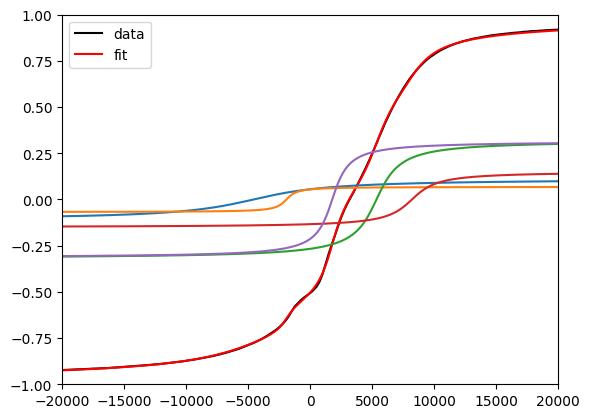

In [30]:
fig, ax = plot_cdf_fit(meas_h, meas_m, cdf_out)

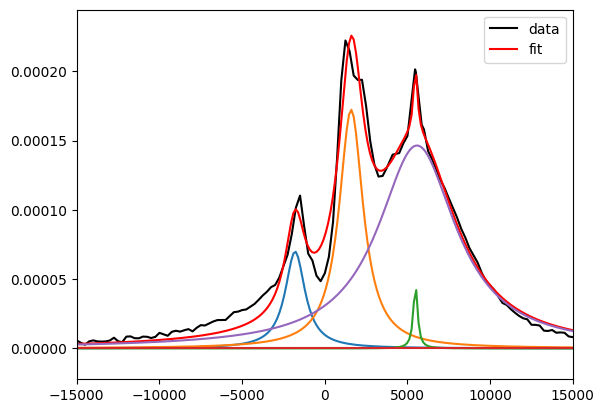

In [28]:
fig, ax = plot_pdf_fit(meas_h, meas_dmdh, pdf_out)

In [13]:
combo_out = fit_multi_cauchy_cdf_and_pdf(meas_h, meas_m, meas_dmdh, params)
combo_out.params

name,value,initial value,min,max,vary
m_s_0,0.25265234,0.2,0.00000000,1.00000000,True
h_c_0,-2840.47650,-1492.04553222656,-700000.000,700000.000,True
gamma_0,535.977872,500,0.00000000,100000.000,True
m_s_1,0.19472458,0.2,0.00000000,1.00000000,True
h_c_1,502.741189,1252.74133300781,-700000.000,700000.000,True
gamma_1,0.01268293,500,0.00000000,100000.000,True
m_s_2,0.13656022,0.2,0.00000000,1.00000000,True
h_c_2,4253.92076,5864.71142578125,-700000.000,700000.000,True
gamma_2,0.03737093,500,0.00000000,100000.000,True
m_s_3,0.15285107,0.2,0.00000000,1.00000000,True


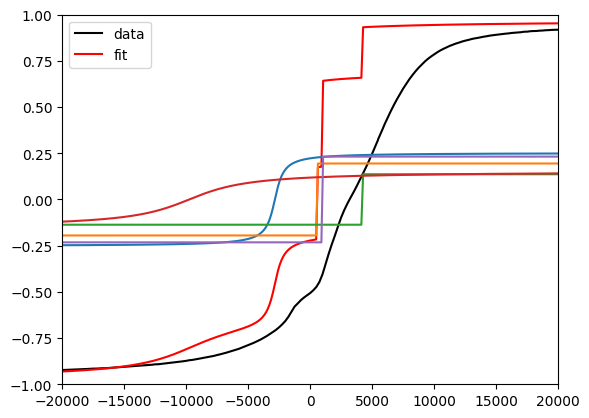

In [14]:
fig, ax = plot_cdf_fit(meas_h, meas_m, combo_out)

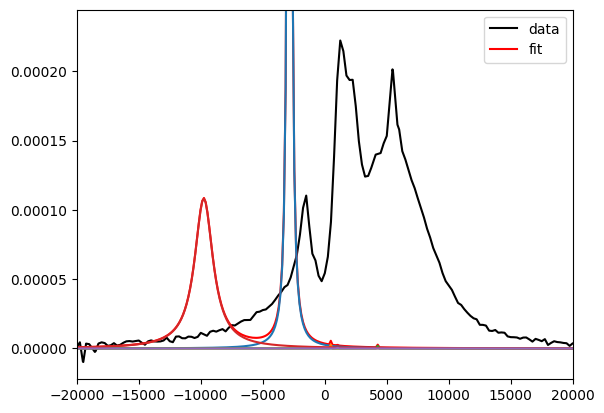

In [17]:
fig, ax = plot_pdf_fit(meas_h, meas_dmdh, combo_out)

In [ ]:
cdf_m_s = [cdf_out.params[i] for i in m_s_i]
cdf_m_s.append(sum(cdf_m_s))